In [4]:
import pandas as pd

df = pd.read_csv(r'c:\Users\sathi\Documents\data 3\household_power_consumption.txt', sep=';')
print(df.columns)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


C:\Users\sathi\AppData\Local\Temp\ipykernel_6648\2622558606.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'c:\Users\sathi\Documents\data 3\household_power_consumption.txt', sep=';')


In [6]:
import pandas as pd

cols_to_convert = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col],errors='coerce')

In [7]:
print(df[cols_to_convert].dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [30]:
print(df.columns.tolist())


['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [31]:
print(df.columns)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [8]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [37]:
df.shape

(2075259, 9)

In [11]:
print(df.isnull().sum())

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [46]:
print(df.isnull().sum().sum())

181853


In [92]:
print(df.shape)

(2075259, 9)


In [12]:
print("number of missing values per column:")
print(df.isnull().sum()[df.isnull().sum()>0])

number of missing values per column:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [13]:
df['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].mean())

In [14]:
df['Global_reactive_power'] = df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean())

In [15]:
df['Global_intensity'] = df['Global_intensity'].fillna(df['Global_intensity'].mean())

In [16]:
df['Voltage'] = df['Voltage'].fillna(df['Voltage'].mean())

In [17]:
df['Sub_metering_1'] = df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean())

In [18]:
df['Sub_metering_2'] = df['Sub_metering_2'].fillna(df['Sub_metering_3'].mean())

In [19]:
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean())

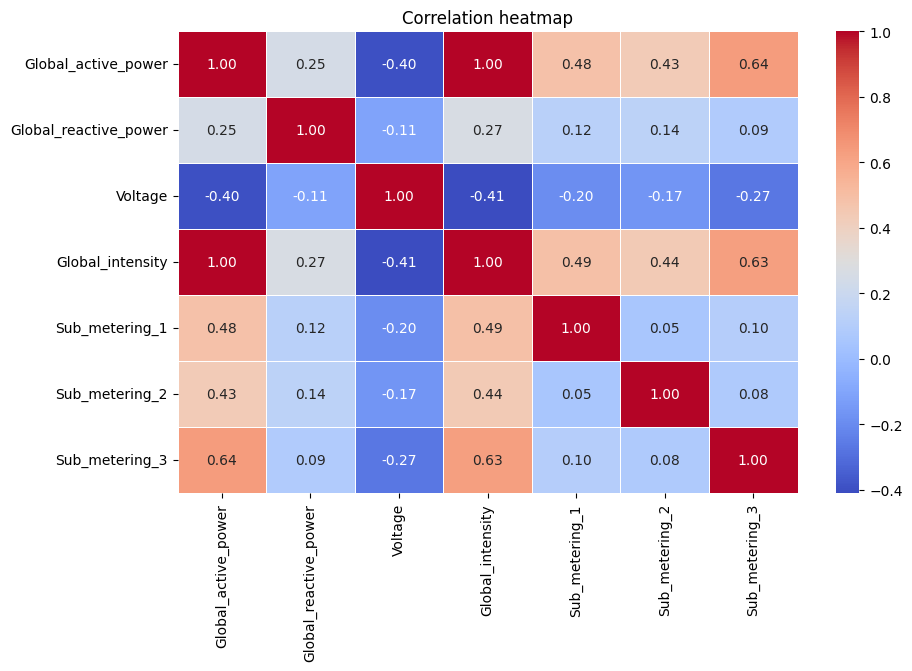

In [ ]:
#correlation matrix (numeric features only)
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation heatmap")
plt.show()

In [21]:
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


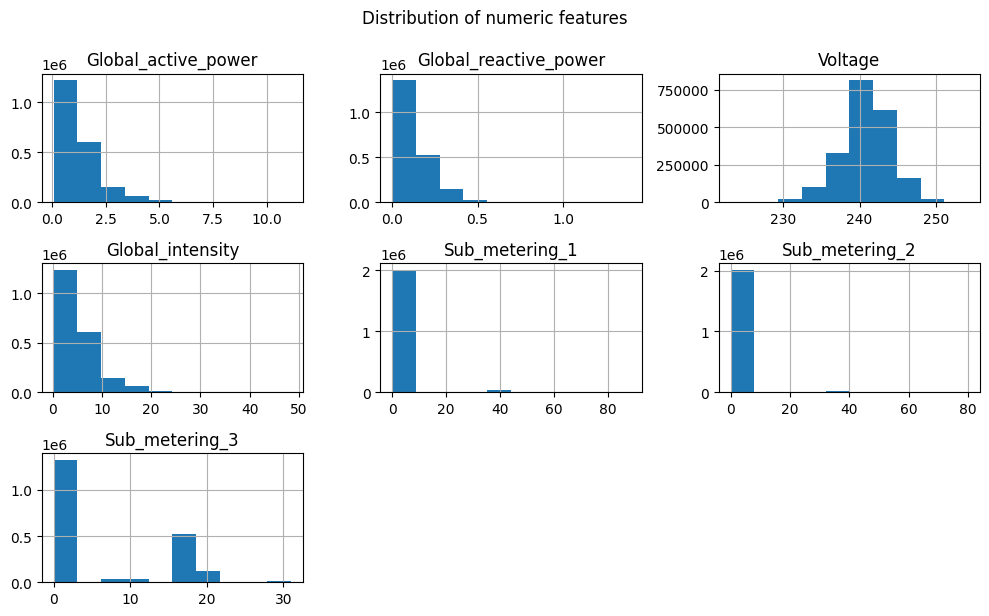

In [ ]:
#histogram for all numeric columns
df.hist(figsize=(10,6))
plt.tight_layout()
plt.suptitle("Distribution of numeric features", y=1.02)
plt.show()

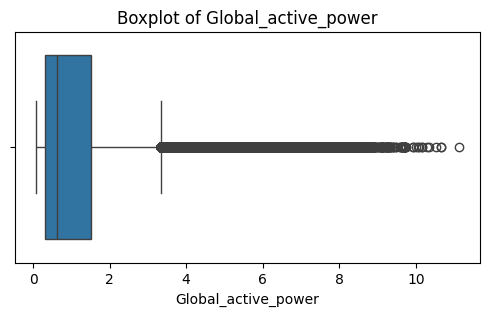

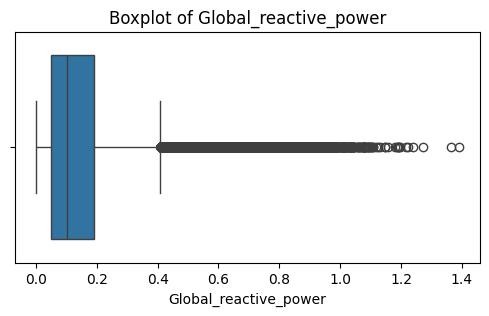

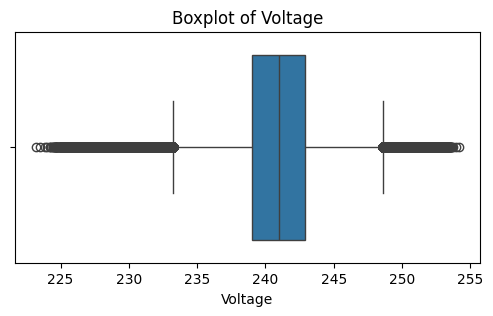

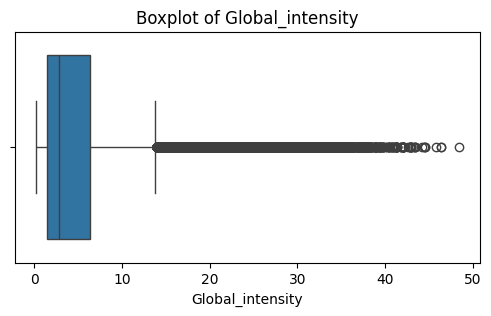

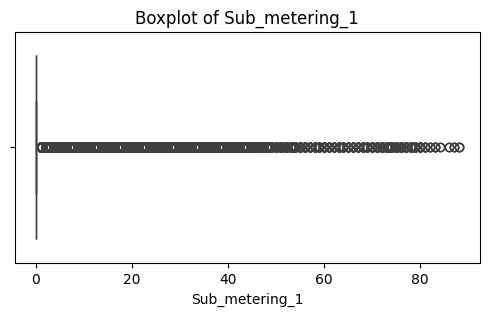

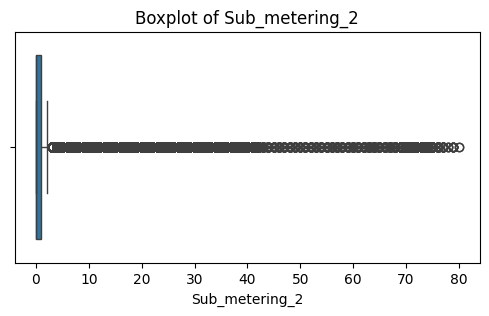

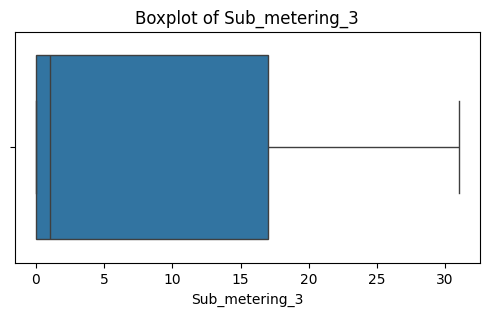

In [25]:
#boxplot for outliner detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [42]:
! pip install -U scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 4.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 5.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.7 MB 6.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.7 MB 6.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 7.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.7 MB 6.6 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.5 MB 5.0 MB/s eta 0:00:08
   - -------------------------------------- 1.8/38.5 MB 4.4 MB/s eta 0:00:09
   -- ------------------------------------- 2.4/38.5 MB 4.5 MB/s eta 0:00:09
   --- ---------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


2 data preprocessing

In [54]:
import pandas as pd
import numpy as np
#load data set
df = pd.read_csv(r"c:\Users\sathi\Documents\data 3\household_power_consumption.txt", sep=';')

numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
                'Sub_metering_2', 'Sub_metering_3']

df[numeric_cols] = df[numeric_cols].replace('?', np.nan).astype(float)

C:\Users\sathi\AppData\Local\Temp\ipykernel_6648\356399559.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"c:\Users\sathi\Documents\data 3\household_power_consumption.txt", sep=';')


In [ ]:
#handle missing data (fill mean)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [ ]:
#parse date and time into proper datetim for calculations
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

In [ ]:
#create new feature
df['Daily_avg_Power'] = df.groupby(df["Datetime"].dt.date)['Global_active_power'].transform('mean')
df['Hour'] = df['Datetime'].dt.hour
df['Peak_hour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)
df['Rolling_avg_power'] = df['Global_active_power'].rolling (window=3, min_periods=1).mean()

In [ ]:
#normalize numeric data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [69]:
print(df.head())

         Date      Time  Global_active_power  Global_reactive_power   Voltage  \
0  16/12/2006  17:24:00             0.374796               0.300719  0.376090   
1  16/12/2006  17:25:00             0.478363               0.313669  0.336995   
2  16/12/2006  17:26:00             0.479631               0.358273  0.326010   
3  16/12/2006  17:27:00             0.480898               0.361151  0.340549   
4  16/12/2006  17:28:00             0.325005               0.379856  0.403231   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0          0.377593             0.0          0.0125        0.548387   
1          0.473029             0.0          0.0125        0.516129   
2          0.473029             0.0          0.0250        0.548387   
3          0.473029             0.0          0.0125        0.548387   
4          0.323651             0.0          0.0125        0.548387   

             Datetime  Daily_avg_Power  Hour  Peak_hour  Rolling_avg_power  
0 2006-12

3 Feature Engineering

In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'c:\Users\sathi\Documents\data 3\household_power_consumption.txt', sep=';')

#con numeric to float
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
                'Sub_metering_2', 'Sub_metering_3']

df[numeric_cols] = df[numeric_cols].replace('?', np.nan).astype(float)

C:\Users\sathi\AppData\Local\Temp\ipykernel_6648\2254432143.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'c:\Users\sathi\Documents\data 3\household_power_consumption.txt', sep=';')


In [73]:
#handle missing data (fill mean)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

#parse date and time into proper datetim for calculations
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)


In [74]:
#feature engineering
#hour of the day

df['Hour'] = df['Datetime'].dt.hour

In [75]:
#day of the week
df['DayofWeek'] = df['Datetime'].dt.dayofweek

In [76]:
#weekend flag
df['Isweekend'] = df['DayofWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [77]:
#Daily avg power
df['Daily_Avg_power'] = df.groupby(df['Datetime'].dt.date)['Global_active_power'].transform('mean')

In [78]:
#Peak hour flag
df['PeakHour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

In [79]:
#Rolling avg 
df['Rolling_avg_power'] = df['Global_active_power'].rolling(window=3, min_periods=1).mean()

In [80]:
print(df.head(4))

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   

             Datetime  Hour  DayofWeek  Isweekend  Daily_Avg_power  PeakHour  \
0 2006-12-16 17:24:00    17          5          1         3.053475         0   
1 2006-12-16 17:25:00    17          5          1         3.053475         0   
2 2

4 MODEL SELECTION

In [100]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"c:\Users\sathi\Documents\data 3\household_power_consumption.txt", sep=';', low_memory=True)

#numeric columns
num_cols= ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
           'Sub_metering_2', 'Sub_metering_3']

#clean data
df[num_cols] = df[num_cols].replace('?', np.nan).astype(float)

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


C:\Users\sathi\AppData\Local\Temp\ipykernel_6648\4198125278.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"c:\Users\sathi\Documents\data 3\household_power_consumption.txt", sep=';', low_memory=True)


In [102]:
print(df.dtypes)

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [103]:
print("number of missing values per column:")
print(df.isnull().sum()[df.isnull().sum()>0])

number of missing values per column:
Series([], dtype: int64)


In [104]:
#features and target
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity']]
y = df['Global_active_power']

In [108]:
from sklearn.model_selection import train_test_split

X, _, y, _= train_test_split(X, y, train_size=0.2, random_state=42)

In [109]:
#split test
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


#train models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50), max_iter=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name}: RMSE = {rmse:.3f}, MAE={mae:.3f}, R² = {r2:.3f}")


Linear Regression: RMSE = 0.043, MAE=0.028, R² = 0.998
Random Forest: RMSE = 0.041, MAE=0.023, R² = 0.999
Gradient Boosting: RMSE = 0.043, MAE=0.026, R² = 0.998
Neural Network: RMSE = 0.100, MAE=0.091, R² = 0.991


In [120]:
params = {'n_estimators': [50,100], 'max_depth': [5,10]}
grid = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3,n_jobs=1)
grid.fit(X_train, y_train)
print("Best RF Params:", grid.best_params_)

Best RF Params: {'max_depth': 10, 'n_estimators': 100}


MODEL EVALUATION:

In [121]:
#EVALUATE MODEL

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results.append((name, rmse, mae, r2))


In [122]:
#show result
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'MAE', 'R2'])
print(results_df)



               Model      RMSE       MAE        R2
0  Linear Regression  0.043342  0.028316  0.998290
1      Random Forest  0.040504  0.022720  0.998506
2  Gradient Boosting  0.042690  0.026475  0.998341
3     Neural Network  0.099871  0.091035  0.990919


In [123]:
#best model
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print("\nBest Model:", best_model['Model'])


Best Model: Random Forest
